# **Install and import dependeces**

In [1]:
pip install --upgrade gpflow torch tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [3]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Financial Forecast**

## Cielo

In [ ]:
# Load data
cielo_data = pd.read_csv('/content/cielo_data.csv')
cielo_data.head()

,Date,Close
0,1/4/2010 16:56:00,7.94
1,1/5/2010 16:56:00,7.88
2,1/6/2010 16:56:00,7.86
3,1/7/2010 16:56:00,8.05
4,1/8/2010 16:56:00,7.95


In [ ]:
# Prepare data
price = cielo_data['Close']
sample_size = len(price)

X = np.array(range(sample_size), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(3415, 1) (3415, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size + 1, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[4.86891143]
 [4.91251137]
 [4.94134813]
 [4.95001247]]
Variance: 
[[0.3539478 ]
 [0.62239941]
 [1.08183113]
 [1.81234333]]


Text(0.5, 1.0, 'Cielo Stock Price with GPR')

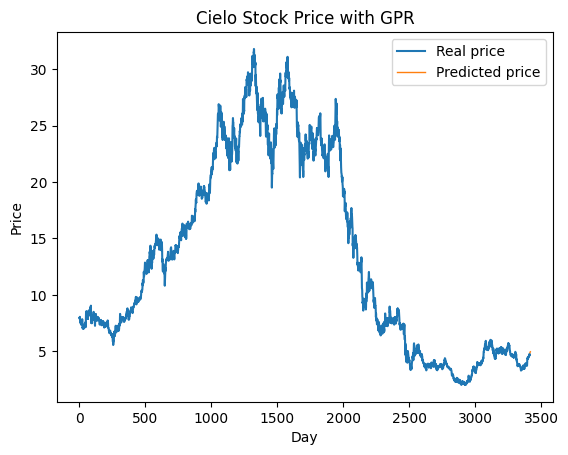

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Cielo Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size + 1, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'Cielo Stock Price with GPR')

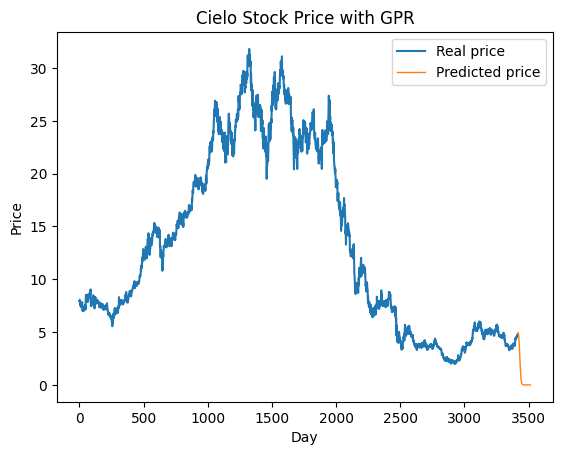

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Cielo Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'Cielo Stock Price with GPR')

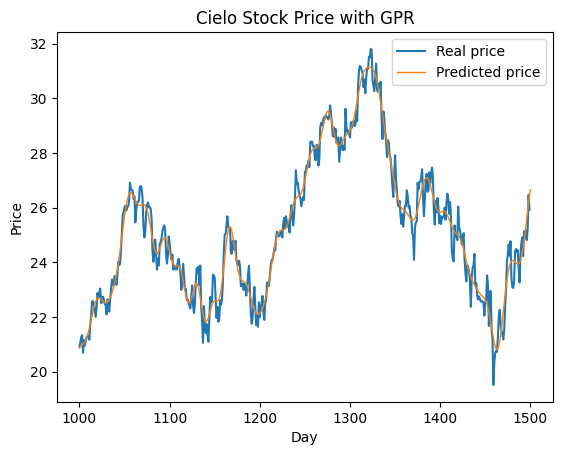

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Cielo Stock Price with GPR')

Text(0.5, 1.0, 'Cielo Stock Price with GPR')

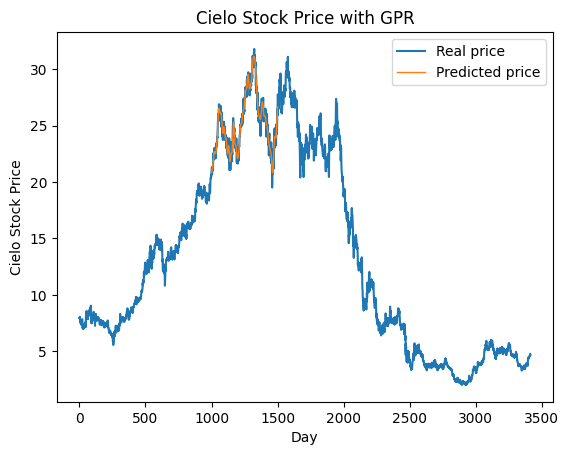

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('Cielo Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


22/22 [==============================] - 0s 2ms/step - loss: 22.0316
Test Loss: 22.031635284423828


4/4 [==============================] - 0s 4ms/step


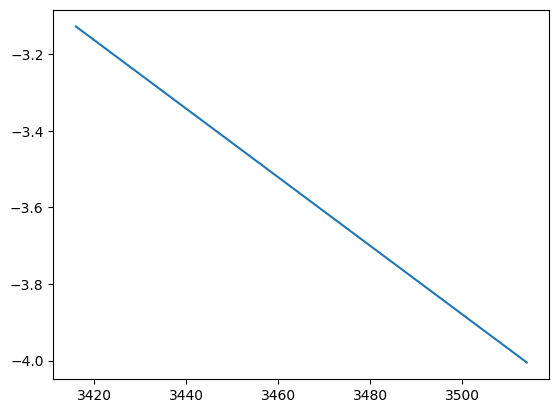

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.

## BB

In [ ]:
# Load data
bb_data = pd.read_csv('/content/bb_data.csv')
bb_data.head()

,Date,Close
0,1/4/2010 16:56:00,29.90
1,1/5/2010 16:56:00,29.60
2,1/6/2010 16:56:00,29.64
3,1/7/2010 16:56:00,29.65
4,1/8/2010 16:56:00,29.82


In [ ]:
# Prepare data
price = bb_data['Close']
sample_size = len(price)

X = np.array(range(sample_size), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(3414, 1) (3414, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[54.52017113]
 [53.94674466]
 [53.13316448]
 [52.06400203]
 [50.73018018]]
Variance: 
[[ 1.20271127]
 [ 2.39272132]
 [ 4.82794948]
 [ 9.22484906]
 [16.41481582]]


Text(0.5, 1.0, 'BB Stock Price with GPR')

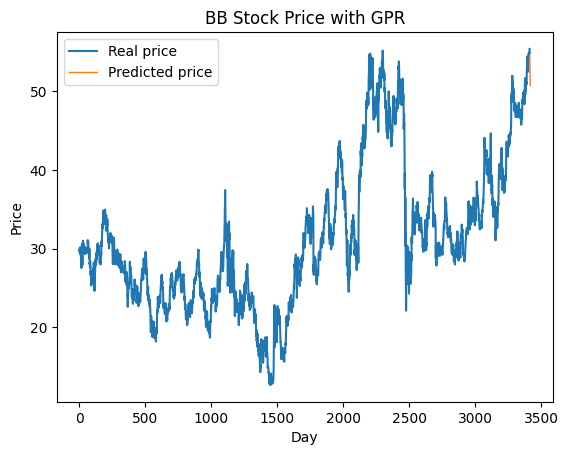

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'BB Stock Price with GPR')

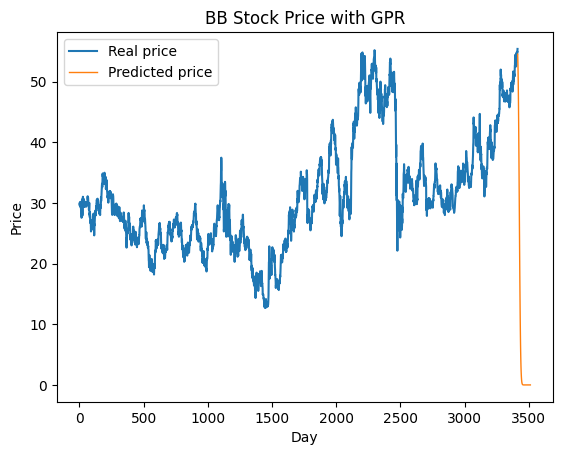

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'BB Stock Price with GPR')

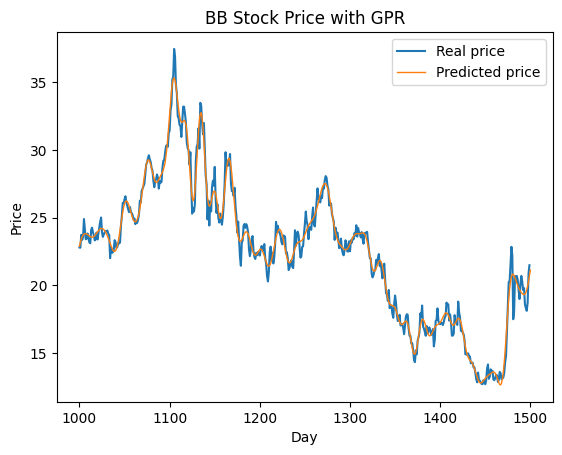

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Stock Price with GPR')

Text(0.5, 1.0, 'BB Stock Price with GPR')

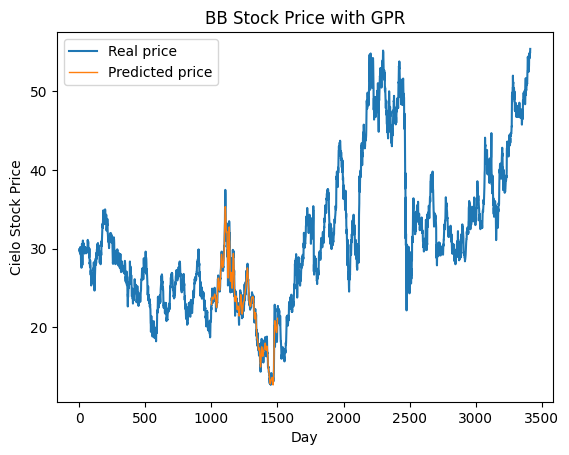

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('BB Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


22/22 [==============================] - 0s 2ms/step - loss: 175.8842
Test Loss: 175.8842315673828


4/4 [==============================] - 0s 3ms/step


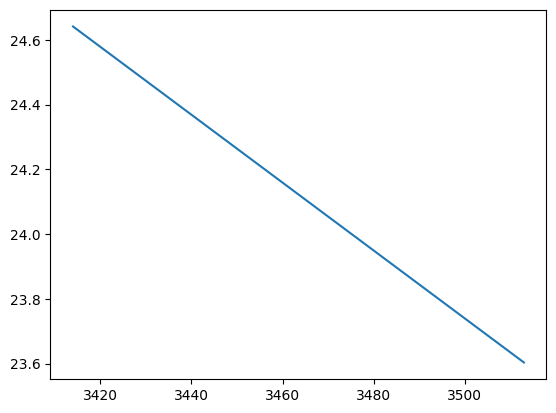

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.


## BB Seg.

In [ ]:
# Load data
bb_seg_data = pd.read_csv('/content/bb_seg_data.csv')
bb_seg_data.head()

,Date,Close
0,4/29/2013 16:56:00,16.60
1,4/30/2013 16:56:00,17.05
2,5/2/2013 16:56:00,17.50
3,5/3/2013 16:56:00,17.75
4,5/6/2013 16:56:00,17.93


In [ ]:
# Prepare data
price = bb_seg_data['Close']
sample_size = len(price)

X = np.array(range(sample_size), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(2645, 1) (2645, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[33.11135704]
 [32.67575613]
 [32.09389527]
 [31.36371609]
 [30.48604457]]
Variance: 
[[0.6304395 ]
 [1.24375417]
 [2.50205687]
 [4.79216818]
 [8.58393646]]


Text(0.5, 1.0, 'BB Seg. Stock Price with GPR')

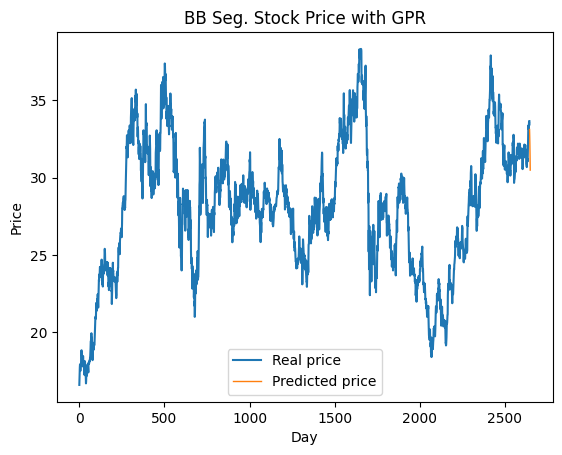

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Seg. Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'BB Seg. Stock Price with GPR')

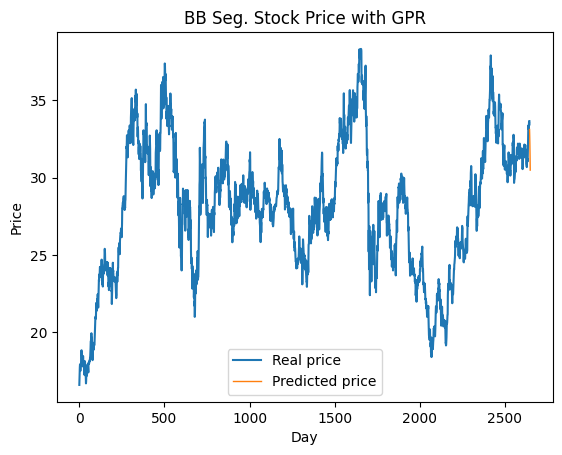

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Seg. Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'BB Seg. Stock Price with GPR')

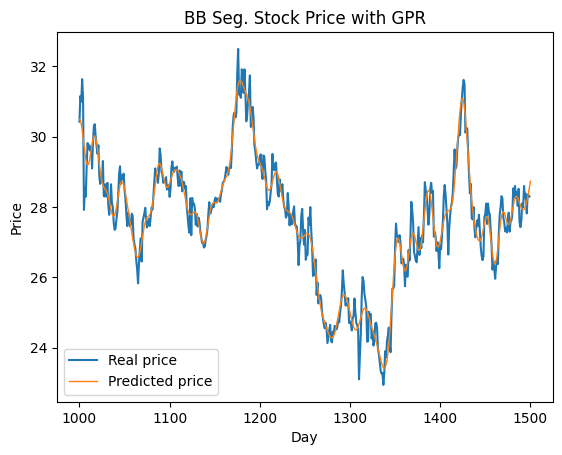

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('BB Seg. Stock Price with GPR')

Text(0.5, 1.0, 'BB Seg. Stock Price with GPR')

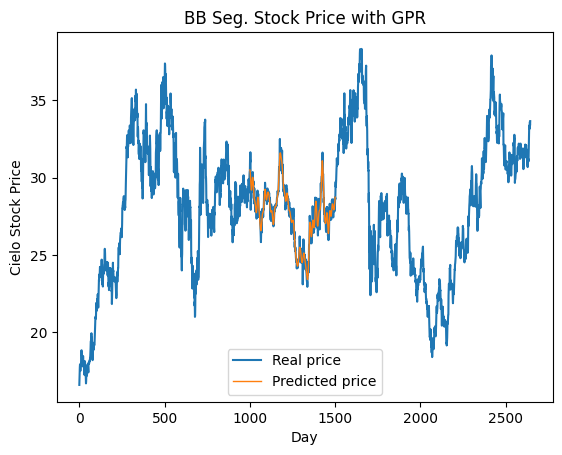

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('BB Seg. Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


17/17 [==============================] - 0s 3ms/step - loss: 108.0147
Test Loss: 108.01467895507812


1/1 [==============================] - 0s 107ms/step


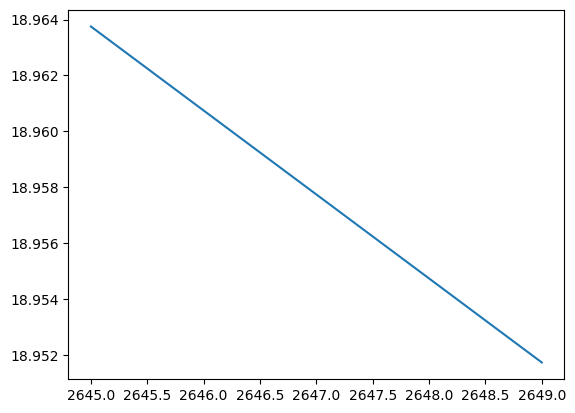

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.


## Bradesco


In [ ]:
# Load data
bradesco_data = pd.read_csv('/content/bradesco_data.csv')
bradesco_data.head()

,Date,Close
0,1/4/2010 16:56:00,12.16
1,1/5/2010 16:56:00,12.10
2,1/6/2010 16:56:00,12.00
3,1/7/2010 16:56:00,11.97
4,1/8/2010 16:56:00,11.95


In [ ]:
# Prepare data
price = bradesco_data['Close']
sample_size = len(price)

X = np.array(range(sample_size), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(3465, 1) (3465, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[16.57717947]
 [16.26162013]
 [15.88411116]
 [15.4458216 ]
 [14.94931358]]
Variance: 
[[0.29882138]
 [0.421701  ]
 [0.62775713]
 [0.95260388]
 [1.43926688]]


Text(0.5, 1.0, 'Bradesco Stock Price with GPR')

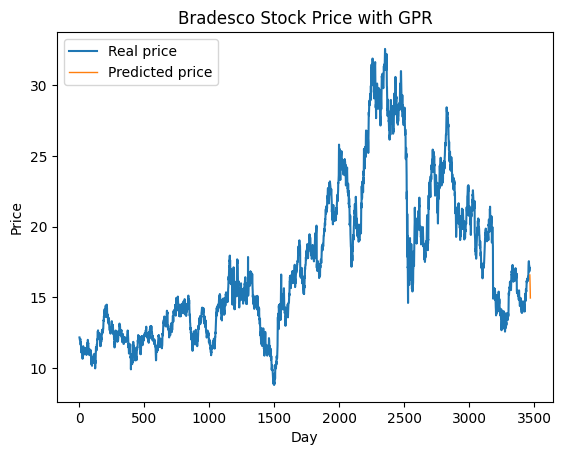

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Bradesco Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'Bradesco Stock Price with GPR')

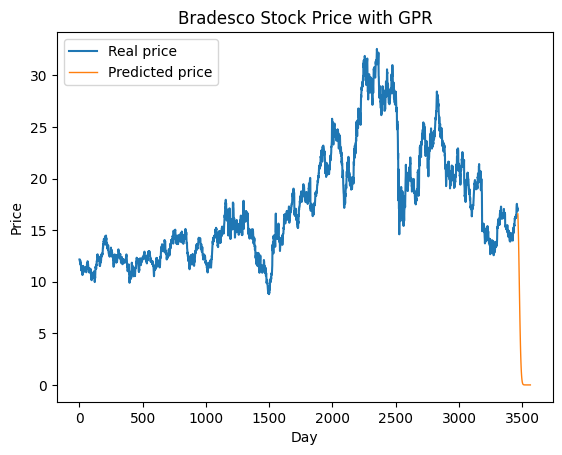

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Bradesco Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'Bradesco Stock Price with GPR')

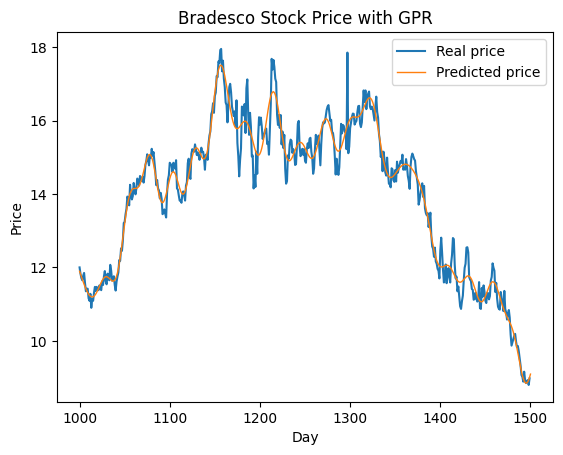

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Bradesco Stock Price with GPR')

Text(0.5, 1.0, 'Bradesco Stock Price with GPR')

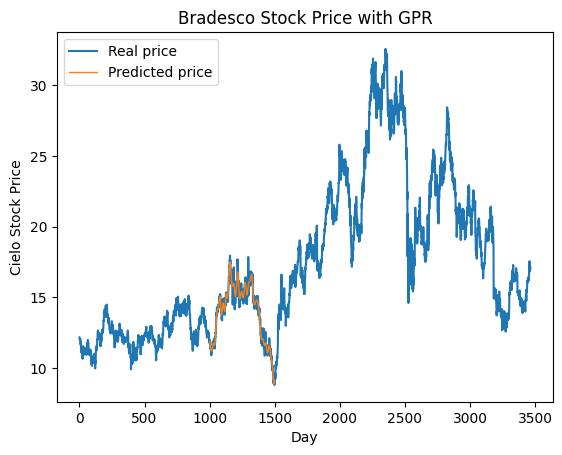

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('Bradesco Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


22/22 [==============================] - 0s 2ms/step - loss: 14.4719
Test Loss: 14.471878051757812


4/4 [==============================] - 0s 3ms/step


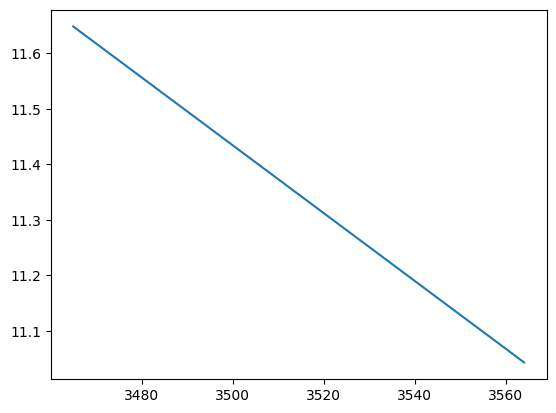

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.


## Vale

In [ ]:
# Load data
vale_data = pd.read_csv('/content/vale_data.csv')
vale_data.head()

,Date,Close
0,1/4/2010 16:56:00,51.49
1,1/5/2010 16:56:00,51.97
2,1/6/2010 16:56:00,53.07
3,1/7/2010 16:56:00,53.29
4,1/8/2010 16:56:00,53.81


In [ ]:
# Prepare data
price = vale_data['Close']
sample_size = len(price)

X = np.array(range(sample_size), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(3414, 1) (3414, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[76.46987001]
 [75.66760307]
 [74.53195461]
 [73.05084375]
 [71.22215629]
 [69.05380314]]
Variance: 
[[ 5.08855182]
 [ 8.76020248]
 [14.95631747]
 [24.68503281]
 [39.06251999]
 [59.22600122]]


Text(0.5, 1.0, 'Vale Stock Price with GPR')

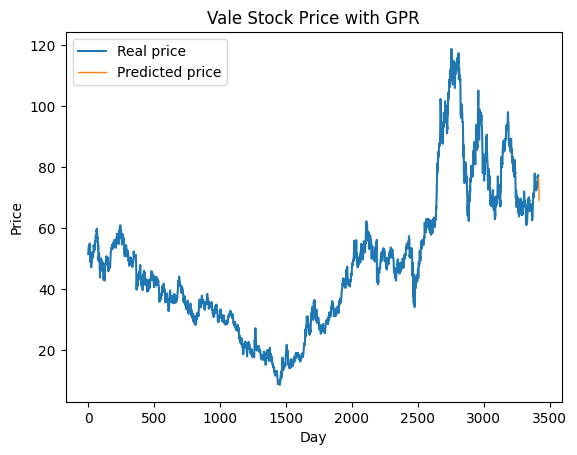

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Vale Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'Vale Stock Price with GPR')

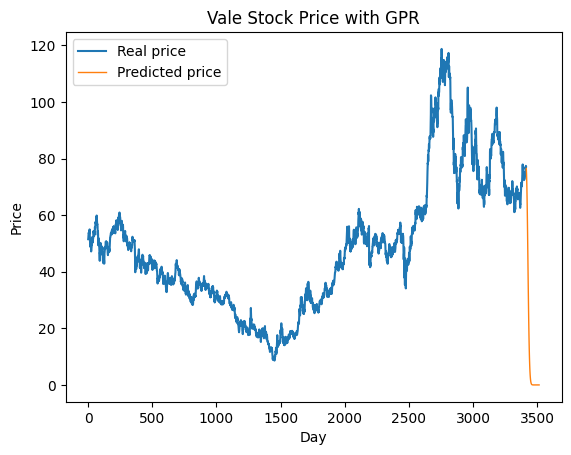

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Vale Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'Vale Stock Price with GPR')

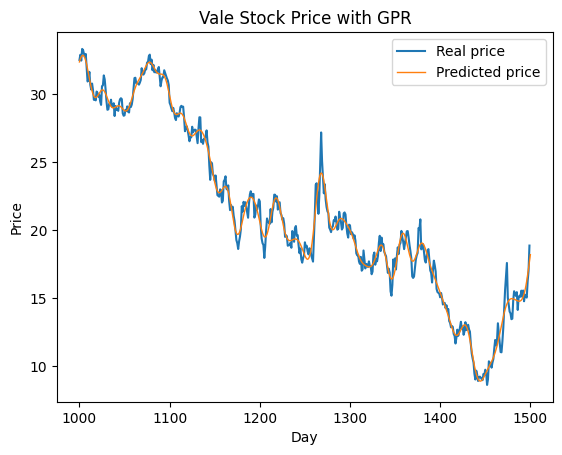

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Vale Stock Price with GPR')

Text(0.5, 1.0, 'Vale Stock Price with GPR')

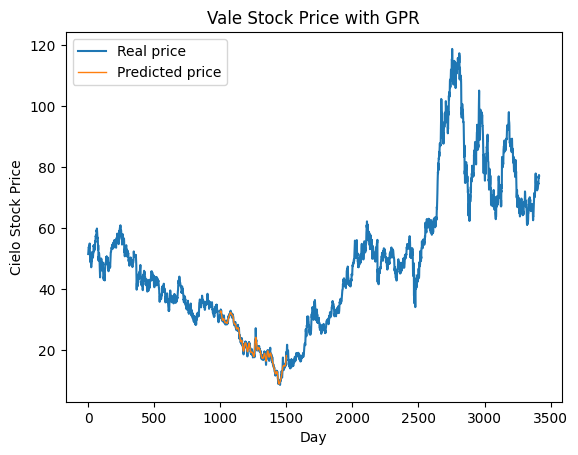

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('Vale Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


22/22 [==============================] - 0s 2ms/step - loss: 468.2153
Test Loss: 468.21527099609375


4/4 [==============================] - 0s 3ms/step


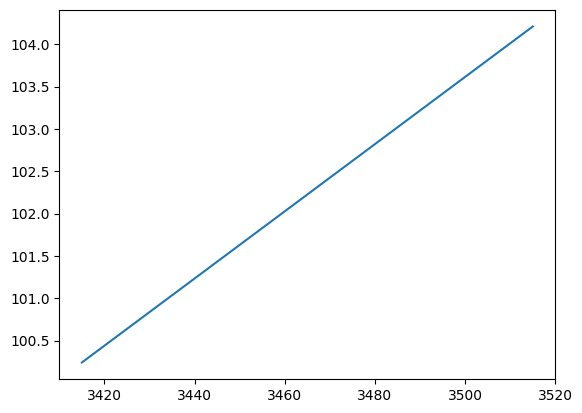

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.


## Magalu

In [ ]:
# Load data
magalu_data = pd.read_csv('/content/magalu_data.csv')
magalu_data.head()

,Date,Close
0,5/2/2011 16:56:00,0.48
1,5/3/2011 16:56:00,0.48
2,5/4/2011 16:56:00,0.48
3,5/5/2011 16:56:00,0.48
4,5/6/2011 16:56:00,0.48


In [ ]:
# Prepare data
price = magalu_data['Close']
sample_size = len(price)

X = np.array(range(len(price)), dtype='float64')
y = price.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)

(3098, 1) (3098, 1)


In [ ]:
# Create model
kernel = gpflow.kernels.RBF()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

Short term prediction (5 days)

In [ ]:
days = 5
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

print(f'Predictions: \n{mean}')
print(f'Variance: \n{var}')

Predictions: 
[[2.1259695 ]
 [2.20626714]
 [2.29119946]
 [2.37276924]
 [2.44289279]]
Variance: 
[[0.1023196 ]
 [0.18859505]
 [0.35691007]
 [0.64948487]
 [1.11321843]]


Text(0.5, 1.0, 'Magalu Stock Price with GPR')

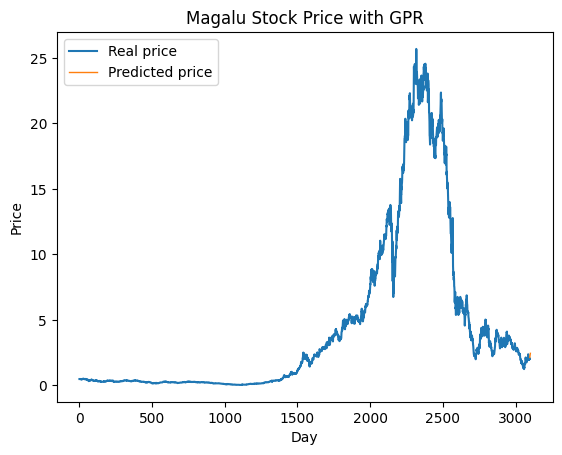

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Magalu Stock Price with GPR')

Long term prediction (100 days)

In [ ]:
days = 100
X_new = np.array([[x] for x in range(sample_size, sample_size + days)], dtype=np.float64)
mean, var = model.predict_y(X_new)

Text(0.5, 1.0, 'Magalu Stock Price with GPR')

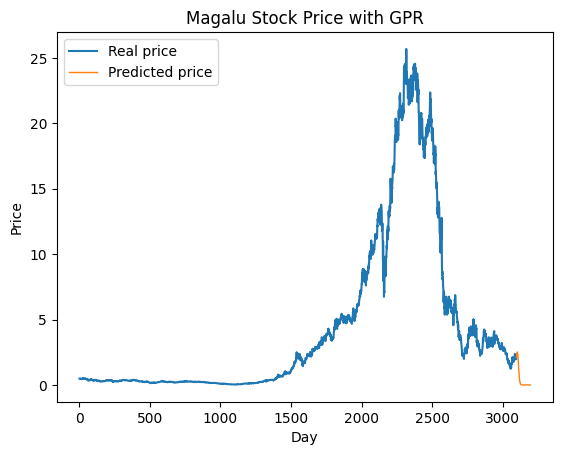

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_new, mean, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Magalu Stock Price with GPR')

Creating holes in the dataset and predicting it


Text(0.5, 1.0, 'Magalu Stock Price with GPR')

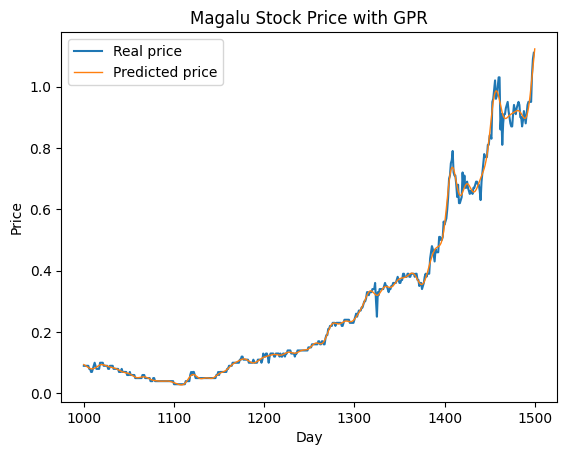

In [ ]:
X_missing = np.array([[x] for x in range(1000, 1501)], dtype=np.float64)
mean_missing, var_missing = model.predict_y(X_missing)

plt.figure()
plt.plot(X[1000:1500], y[1000:1500], mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Magalu Stock Price with GPR')

Text(0.5, 1.0, 'Magalu Stock Price with GPR')

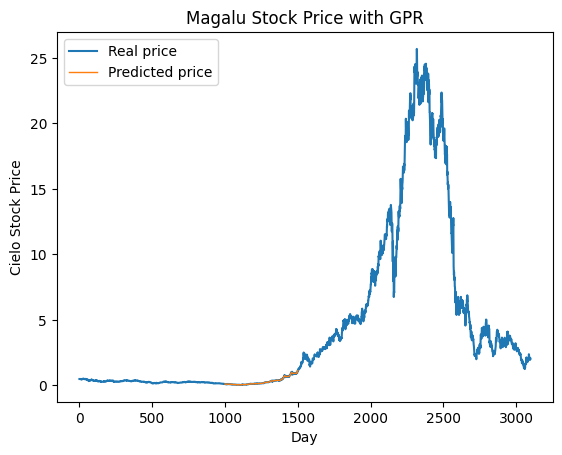

In [ ]:
plt.figure()
plt.plot(X, y, mew=2, label='Real price')
plt.plot(X_missing, mean_missing, lw=1, label='Predicted price')
plt.xlabel('Day')
plt.ylabel('Cielo Stock Price')
plt.legend()
plt.title('Magalu Stock Price with GPR')

**NOW USING NEURAL NETWORK**

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


20/20 [==============================] - 0s 2ms/step - loss: 615.9788
Test Loss: 615.978759765625


4/4 [==============================] - 0s 3ms/step


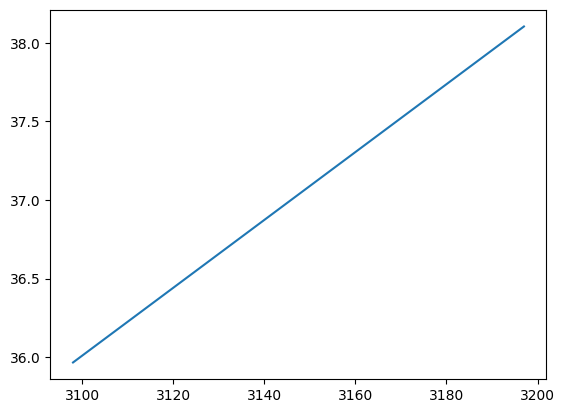

In [ ]:
# Make predictions
predictions = model.predict(X_new)
plt.plot(X_new,predictions)

**OBS:** I've run several structures of FNN and although in some cases the Loss can be very low, the predictions always seem to be a straight line.

# **Weather Forecast**

OBS: X-axe is referred as 'Day' in the graphs but each time step in datase's about 10 minutes, therefore read the 'Day' label as 'Time'.


## 2018a

In [56]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2018a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2018 00:10:00,975.22,9.59,284.79,4.85,72.20,11.96,8.63,3.32,5.53,...,3.40,5.29,180.4,0.0,0.0,0.0,0.0,0.0,18.78,412.0
1,01.01.2018 00:20:00,975.16,9.82,285.02,4.81,70.90,12.15,8.61,3.53,5.51,...,3.38,5.05,175.1,0.0,0.0,0.0,0.0,0.0,18.72,411.7
2,01.01.2018 00:30:00,975.03,9.91,285.12,4.75,70.20,12.22,8.58,3.64,5.49,...,3.76,6.97,179.1,0.0,0.0,0.0,0.0,0.0,18.67,411.1
3,01.01.2018 00:40:00,974.88,9.93,285.16,4.68,69.77,12.24,8.54,3.70,5.47,...,3.03,7.53,183.4,0.0,0.0,0.0,0.0,0.0,18.63,411.1
4,01.01.2018 00:50:00,974.82,10.08,285.31,4.63,68.83,12.36,8.51,3.85,5.45,...,3.22,6.01,187.7,0.0,0.0,0.0,0.0,0.0,18.61,411.0


In [57]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [58]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [59]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [60]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [61]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [62]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[ 8.76010021],
       [ 8.72006886],
       [ 8.62013232],
       [ 8.5695685 ],
       [ 8.52940909],
       [ 8.74868695],
       [ 8.92103987],
       [ 9.08065245],
       [ 9.17011889],
       [ 9.20106308],
       [ 9.23004211],
       [ 9.20006666],
       [ 9.20995784],
       [ 9.2502605 ],
       [ 9.22059926],
       [ 9.19097351],
       [ 9.33945118],
       [ 9.53055361],
       [ 9.71017997],
       [ 9.90069494],
       [10.10180266],
       [10.2402666 ],
       [10.32113404],
       [10.39116629],
       [10.45235254],
       [10.53231543],
       [10.61311865],
       [10.73278905],
       [10.89158577],
       [11.0026042 ],
       [11.00377094],
       [11.01340533],
       [11.01214739],
       [11.11343913],
       [11.09203633],
       [10.97163665],
       [10.85197389],
       [10.7508972 ],
       [10.65146543],
       [10.56207607],
       [10.53108456],
       [10.48150434],
       [10.40042596],
    

In [63]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[7.91376020e-06],
       [7.90578575e-06],
       [7.92196748e-06],
       [7.93366722e-06],
       [7.93442392e-06],
       [7.91218859e-06],
       [7.91451690e-06],
       [7.90846330e-06],
       [7.95305037e-06],
       [7.93587911e-06],
       [7.99059431e-06],
       [7.95712490e-06],
       [7.96975597e-06],
       [7.98349298e-06],
       [8.04775423e-06],
       [8.17278429e-06],
       [8.30235454e-06],
       [8.61132081e-06],
       [8.82389518e-06],
       [8.76417412e-06],
       [9.27750748e-06],
       [9.22250125e-06],
       [9.41755512e-06],
       [9.34229261e-06],
       [9.98804840e-06],
       [9.66947787e-06],
       [1.02758271e-05],
       [1.02367697e-05],
       [1.00386309e-05],
       [9.29363101e-06],
       [9.24211723e-06],
       [9.00148676e-06],
       [8.92756303e-06],
       [9.41441190e-06],
       [9.51033813e-06],
       [8.59531370e-06],
       [8.40404333e-06],
       [8.40852532e-06],


Text(0.5, 1.0, 'Temperature Prediction')

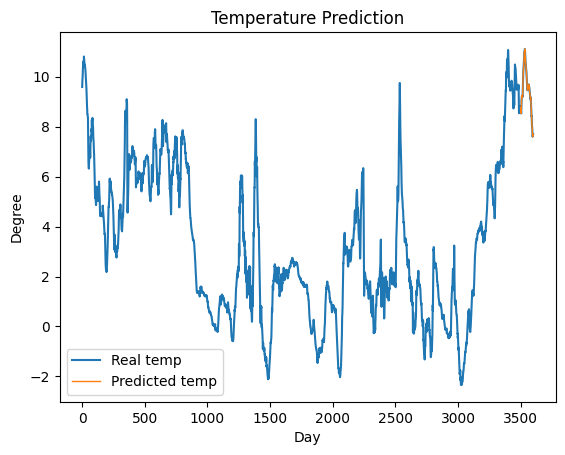

In [64]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

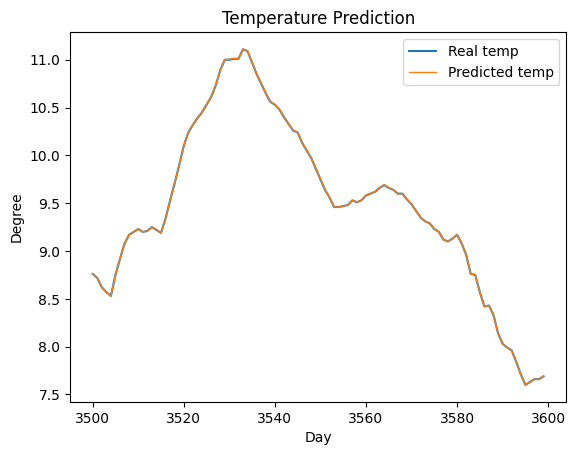

In [65]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2018b


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2018b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2018 00:10:00,992.83,13.16,286.91,4.65,56.19,15.16,8.52,6.64,5.35,...,0.62,1.42,220.10,0.0,0.0,0.0,0.0,0.0,23.89,416.2
1,01.07.2018 00:20:00,992.91,13.06,286.80,4.61,56.41,15.06,8.49,6.56,5.34,...,0.44,0.92,16.92,0.0,0.0,0.0,0.0,0.0,23.71,415.8
2,01.07.2018 00:30:00,992.93,13.07,286.81,4.62,56.41,15.07,8.50,6.57,5.34,...,0.56,1.48,207.50,0.0,0.0,0.0,0.0,0.0,23.53,415.3
3,01.07.2018 00:40:00,992.96,13.17,286.91,4.46,55.43,15.17,8.41,6.76,5.28,...,0.98,1.48,243.90,0.0,0.0,0.0,0.0,0.0,23.36,412.0
4,01.07.2018 00:50:00,993.05,13.20,286.93,4.49,55.41,15.20,8.42,6.78,5.29,...,0.58,1.00,312.90,0.0,0.0,0.0,0.0,0.0,23.19,412.2


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[22.60975801],
       [23.21147559],
       [23.74112974],
       [24.31095819],
       [25.24974309],
       [25.51062832],
       [25.78993397],
       [25.79018627],
       [26.15007527],
       [26.76003934],
       [26.92809827],
       [27.16850438],
       [27.56986985],
       [27.64966518],
       [27.83940711],
       [28.05057253],
       [28.15931204],
       [28.19895346],
       [28.35991099],
       [28.54874903],
       [28.50941961],
       [28.36980471],
       [28.2109008 ],
       [28.77069917],
       [28.82961576],
       [29.09083574],
       [29.40969495],
       [29.36880935],
       [29.56961222],
       [29.54904765],
       [29.67005263],
       [29.97954939],
       [30.00858827],
       [29.92034607],
       [30.15967991],
       [30.31944983],
       [30.32895717],
       [30.18989014],
       [30.45968858],
       [30.5284001 ],
       [30.46042799],
       [30.31898456],
       [30.62813602],
    

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.08102506e-06],
       [1.10058284e-06],
       [1.13457611e-06],
       [1.20745210e-06],
       [1.24773180e-06],
       [1.22118911e-06],
       [1.19907020e-06],
       [1.13946556e-06],
       [1.10128133e-06],
       [1.36717393e-06],
       [1.86450018e-06],
       [1.07636845e-06],
       [1.07729977e-06],
       [1.08055940e-06],
       [1.09476207e-06],
       [1.09965152e-06],
       [1.09848736e-06],
       [1.09126961e-06],
       [1.08847564e-06],
       [1.14086254e-06],
       [1.23934990e-06],
       [2.09290704e-06],
       [1.41560270e-06],
       [1.20279549e-06],
       [1.27124770e-06],
       [1.29383227e-06],
       [1.29988587e-06],
       [1.32247044e-06],
       [1.40954910e-06],
       [1.37671998e-06],
       [1.41560270e-06],
       [1.59814192e-06],
       [1.68545341e-06],
       [1.45308843e-06],
       [1.38743019e-06],
       [1.45890920e-06],
       [1.38463622e-06],
       [1.34901313e-06],


Text(0.5, 1.0, 'Temperature Prediction')

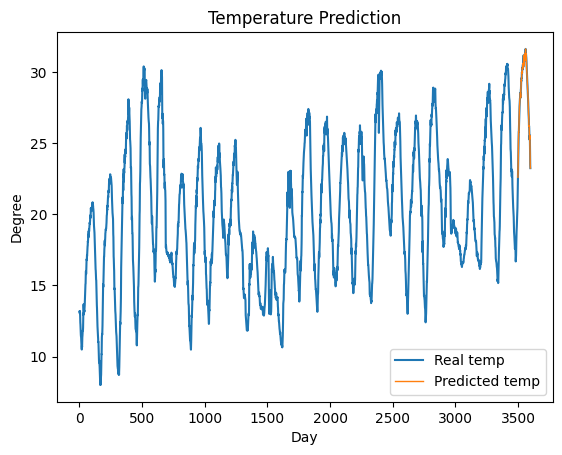

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

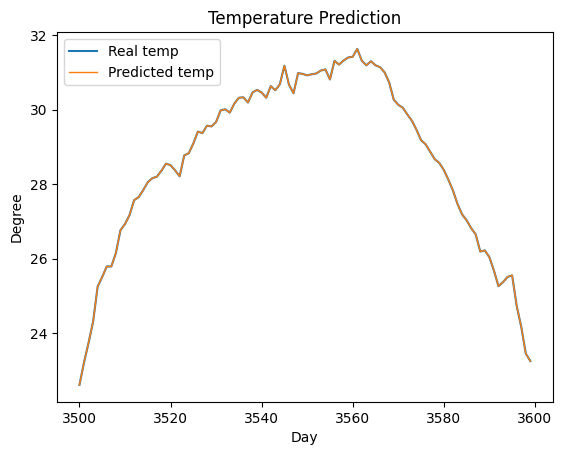

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2019a


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2019a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.8,9.98,9.07,0.92,5.64,...,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.5,9.99,9.04,0.95,5.62,...,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.1,10.01,9.02,0.99,5.61,...,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.7,10.02,8.99,1.03,5.59,...,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.1,10.03,8.93,1.09,5.56,...,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[-5.11860058],
       [-5.1010325 ],
       [-5.04616557],
       [-5.03253059],
       [-4.98240216],
       [-4.93140736],
       [-4.84918263],
       [-4.84851503],
       [-4.8872868 ],
       [-4.90566427],
       [-4.81872938],
       [-4.64552773],
       [-4.51161549],
       [-4.43366069],
       [-4.21628955],
       [-4.29155407],
       [-4.34038935],
       [-4.29459211],
       [-4.22941982],
       [-4.11575259],
       [-4.08467036],
       [-3.93691388],
       [-3.46163931],
       [-3.4649448 ],
       [-3.38465412],
       [-3.59226091],
       [-3.66807465],
       [-3.57808019],
       [-3.48630754],
       [-3.34989406],
       [-3.24299682],
       [-3.17673244],
       [-3.24863388],
       [-3.27009391],
       [-3.26185986],
       [-3.25473049],
       [-3.31209077],
       [-3.33831422],
       [-3.33670701],
       [-3.39170565],
       [-3.45256014],
       [-3.49653884],
       [-3.53435048],
    

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.24860583e-06],
       [1.17556999e-06],
       [1.14178067e-06],
       [1.18638093e-06],
       [1.17938100e-06],
       [2.64141557e-06],
       [1.70563601e-06],
       [1.72884222e-06],
       [1.84074077e-06],
       [1.73357137e-06],
       [2.68028600e-06],
       [4.13856344e-06],
       [4.36335734e-06],
       [4.32400941e-06],
       [4.81194241e-06],
       [5.00644649e-06],
       [5.08441065e-06],
       [5.69622273e-06],
       [1.09285030e-05],
       [8.87538465e-06],
       [9.19457682e-06],
       [9.04705360e-06],
       [7.88023647e-06],
       [1.30534125e-05],
       [2.62953300e-05],
       [4.77530046e-06],
       [4.83992824e-06],
       [3.88779506e-06],
       [5.44049374e-06],
       [2.60992841e-05],
       [7.09575204e-06],
       [4.44501245e-06],
       [3.99834164e-06],
       [3.10638655e-06],
       [5.10412122e-06],
       [3.77948880e-06],
       [4.58812576e-06],
       [3.25753092e-06],


Text(0.5, 1.0, 'Temperature Prediction')

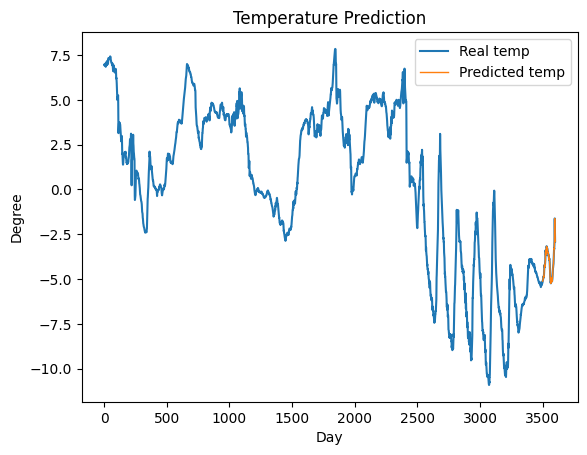

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

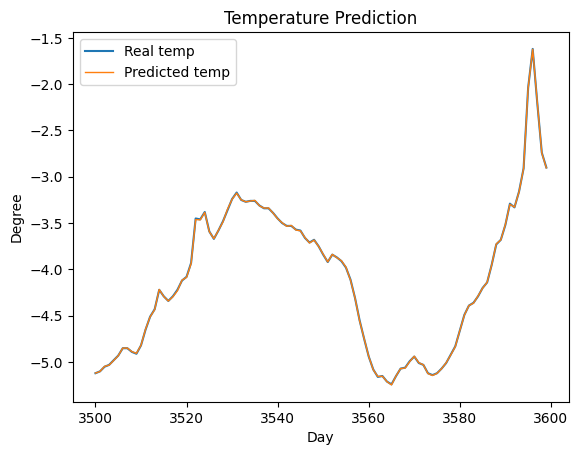

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2019b


In [6]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2019b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2019 00:10:00,987.40,25.91,300.16,17.66,60.41,33.49,20.23,13.26,12.84,...,1.42,2.36,21.19,0.0,0.0,0.0,0.0,0.0,36.93,434.1
1,01.07.2019 00:20:00,987.30,25.74,299.99,17.67,61.08,33.15,20.25,12.90,12.86,...,1.48,2.12,353.20,0.0,0.0,0.0,0.0,0.0,36.75,432.5
2,01.07.2019 00:30:00,987.83,25.53,299.74,17.67,61.83,32.74,20.24,12.50,12.85,...,1.28,2.20,287.60,0.0,0.0,0.0,0.0,0.0,36.57,432.8
3,01.07.2019 00:40:00,988.06,25.42,299.61,17.57,61.86,32.53,20.12,12.41,12.77,...,0.95,2.20,249.20,0.0,0.0,0.0,0.0,0.0,36.40,431.9
4,01.07.2019 00:50:00,988.13,25.17,299.35,17.57,62.76,32.05,20.11,11.94,12.76,...,0.74,1.96,238.30,0.0,0.0,0.0,0.0,0.0,36.23,432.3


In [7]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [8]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [9]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [10]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [11]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [12]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[24.30160749],
       [24.92973204],
       [25.61015895],
       [26.02041509],
       [26.77975638],
       [28.00033884],
       [28.39931626],
       [28.43905632],
       [28.99089614],
       [29.22036308],
       [29.7597167 ],
       [29.3797381 ],
       [29.51976382],
       [30.04013713],
       [31.03943082],
       [31.53940553],
       [31.89079455],
       [32.11071989],
       [32.50024694],
       [32.82935062],
       [32.84023646],
       [32.75032162],
       [32.98990064],
       [32.76861123],
       [33.11971506],
       [33.15916023],
       [33.28997427],
       [33.33929481],
       [33.92032031],
       [33.78066579],
       [33.76897368],
       [33.79898798],
       [33.91073829],
       [33.9491799 ],
       [34.09008494],
       [34.21025879],
       [34.06997173],
       [34.29206411],
       [34.35103369],
       [34.62001984],
       [34.5613826 ],
       [34.56184076],
       [34.49078738],
    

In [13]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.05960464e-06],
       [1.10803342e-06],
       [1.11548400e-06],
       [1.15087426e-06],
       [1.11548400e-06],
       [1.21979213e-06],
       [1.21047890e-06],
       [1.19744039e-06],
       [1.17322600e-06],
       [1.15459955e-06],
       [1.17508864e-06],
       [1.17881393e-06],
       [1.25518239e-06],
       [1.24400651e-06],
       [1.21606684e-06],
       [1.17508864e-06],
       [1.17136335e-06],
       [1.17881393e-06],
       [1.16018748e-06],
       [1.16950071e-06],
       [1.21792948e-06],
       [1.18626451e-06],
       [1.24400651e-06],
       [1.16763806e-06],
       [1.18998981e-06],
       [1.20116568e-06],
       [1.20861626e-06],
       [1.25704503e-06],
       [1.27380884e-06],
       [1.24214387e-06],
       [1.14528632e-06],
       [1.17508864e-06],
       [1.19744039e-06],
       [1.14901161e-06],
       [1.22351742e-06],
       [1.23096800e-06],
       [1.31664968e-06],
       [1.40046871e-06],


Text(0.5, 1.0, 'Temperature Prediction')

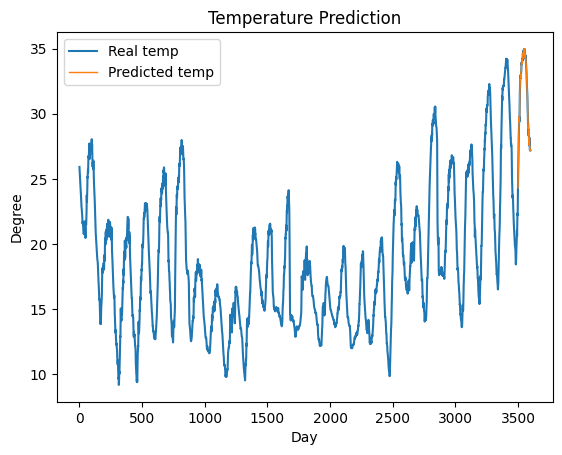

In [14]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

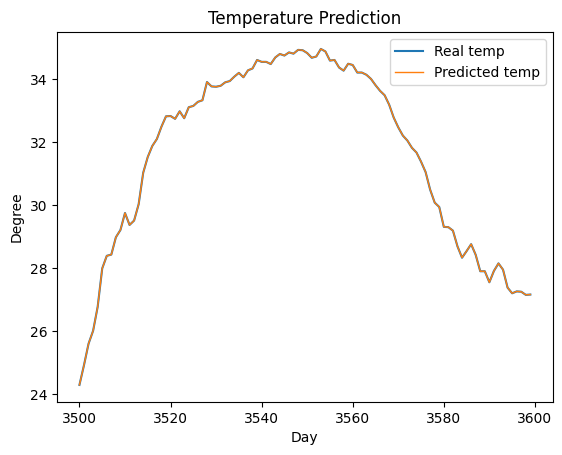

In [15]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2020a


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2020a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2020 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,01.01.2020 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,01.01.2020 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,01.01.2020 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,01.01.2020 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[-3.5162143 ],
       [-3.49082234],
       [-3.41745272],
       [-3.50934917],
       [-3.35732543],
       [-3.27992173],
       [-3.07295498],
       [-3.15070886],
       [-3.11938955],
       [-3.1280635 ],
       [-3.12413036],
       [-3.11483498],
       [-3.06916369],
       [-3.03720925],
       [-2.96471456],
       [-2.85144696],
       [-2.86778015],
       [-2.723225  ],
       [-2.66397263],
       [-2.77504513],
       [-2.68249325],
       [-2.57581728],
       [-2.52344532],
       [-2.46196519],
       [-2.5813711 ],
       [-2.60867918],
       [-2.52256777],
       [-2.38743286],
       [-2.44452071],
       [-2.49673113],
       [-2.31617527],
       [-2.18702862],
       [-2.09049622],
       [-2.02270141],
       [-2.04520634],
       [-1.77158298],
       [-1.86058561],
       [-1.86541811],
       [-1.69564893],
       [-1.27364826],
       [-1.30010759],
       [-1.12031539],
       [-0.90989867],
    

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[7.78972327e-06],
       [7.71614878e-06],
       [7.67749890e-06],
       [7.67703323e-06],
       [7.69106128e-06],
       [7.72546201e-06],
       [7.73826769e-06],
       [8.42028686e-06],
       [7.75072413e-06],
       [7.82878061e-06],
       [7.89187771e-06],
       [7.98320553e-06],
       [8.01830475e-06],
       [8.37284761e-06],
       [8.53169632e-06],
       [8.28867934e-06],
       [8.38926217e-06],
       [9.73281140e-06],
       [8.78268775e-06],
       [8.49083454e-06],
       [8.36190457e-06],
       [8.54444380e-06],
       [8.62040479e-06],
       [8.49508370e-06],
       [8.73257096e-06],
       [8.97541332e-06],
       [8.93606494e-06],
       [8.52663225e-06],
       [8.74479457e-06],
       [8.77180292e-06],
       [8.85038326e-06],
       [8.83460899e-06],
       [9.08047815e-06],
       [9.33472921e-06],
       [8.92005783e-06],
       [8.89339872e-06],
       [9.16784785e-06],
       [8.83443436e-06],


Text(0.5, 1.0, 'Temperature Prediction')

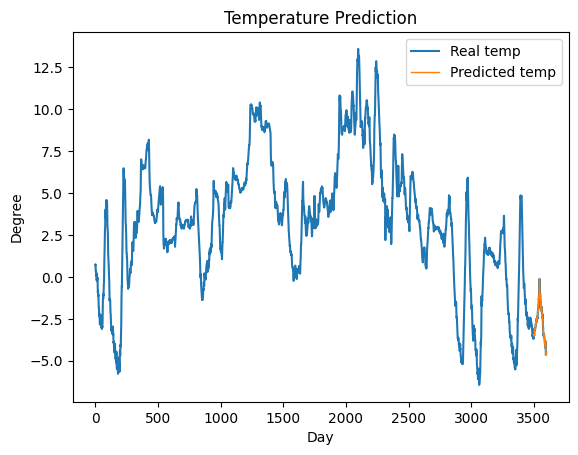

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

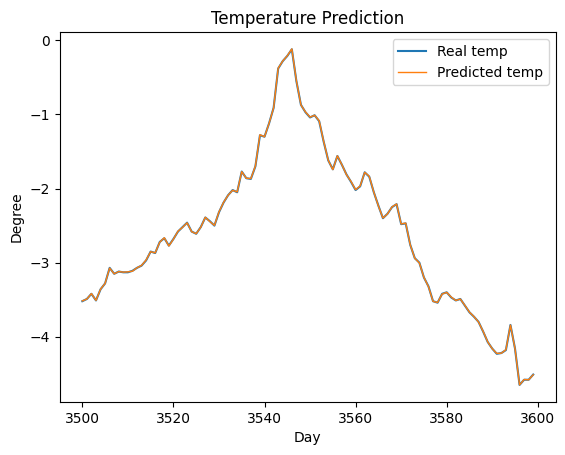

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2020b

In [16]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2020b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2020 00:10:00,983.85,16.17,290.67,10.63,69.68,18.41,12.83,5.58,8.15,...,1.27,2.12,194.0,0.0,0.0,0.0,0.0,0.0,25.08,422.1
1,01.07.2020 00:20:00,983.72,15.90,290.41,10.66,71.02,18.09,12.85,5.24,8.17,...,1.91,2.84,197.1,0.0,0.0,0.0,0.0,0.0,25.03,422.9
2,01.07.2020 00:30:00,983.65,15.69,290.21,10.65,71.92,17.85,12.84,5.01,8.16,...,1.30,2.05,213.3,0.0,0.0,0.0,0.0,0.0,24.97,423.8
3,01.07.2020 00:40:00,983.58,15.56,290.08,10.68,72.68,17.70,12.87,4.84,8.18,...,1.20,2.16,222.9,0.0,0.0,0.0,0.0,0.0,24.90,424.6
4,01.07.2020 00:50:00,983.58,15.64,290.16,10.68,72.31,17.80,12.87,4.93,8.18,...,0.89,2.60,220.3,0.0,0.0,0.0,0.0,0.0,24.83,423.5


In [17]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [18]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [19]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [20]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [21]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [22]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[18.25933105],
       [18.63999177],
       [19.78000698],
       [20.16900931],
       [20.02009016],
       [20.01035341],
       [20.09997284],
       [20.3490126 ],
       [20.73874904],
       [21.1387676 ],
       [21.31949984],
       [21.59873543],
       [22.10061189],
       [22.59952657],
       [22.65033475],
       [22.69890657],
       [23.54854799],
       [23.99947329],
       [23.66198254],
       [23.63024692],
       [23.18930799],
       [23.0499842 ],
       [23.26003947],
       [23.41914828],
       [23.29040083],
       [23.35893293],
       [24.01088978],
       [23.96035276],
       [23.77917472],
       [23.78885899],
       [24.25967338],
       [25.31061634],
       [24.87866124],
       [24.28070113],
       [24.87937685],
       [25.41005033],
       [25.04879296],
       [25.44076489],
       [25.27942392],
       [25.35122401],
       [25.40996208],
       [25.87011225],
       [25.52018358],
    

In [23]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.08172356e-06],
       [1.16915146e-06],
       [1.14898251e-06],
       [1.11376687e-06],
       [1.09287032e-06],
       [1.08346979e-06],
       [1.48303627e-06],
       [1.07738709e-06],
       [1.08710776e-06],
       [1.08434290e-06],
       [1.08984352e-06],
       [1.11897646e-06],
       [1.13891258e-06],
       [1.22538006e-06],
       [1.09121140e-06],
       [1.18478022e-06],
       [1.15282421e-06],
       [1.21839514e-06],
       [1.91447146e-06],
       [1.21775486e-06],
       [1.19907020e-06],
       [1.39039878e-06],
       [1.27546776e-06],
       [1.06365008e-06],
       [1.05590846e-06],
       [1.18093851e-06],
       [1.22130553e-06],
       [1.25233021e-06],
       [1.05116453e-06],
       [1.08064671e-06],
       [1.11967495e-06],
       [1.11041993e-06],
       [1.03282912e-06],
       [1.09711948e-06],
       [1.10241638e-06],
       [1.08809729e-06],
       [1.12179953e-06],
       [1.06498885e-06],


Text(0.5, 1.0, 'Temperature Prediction')

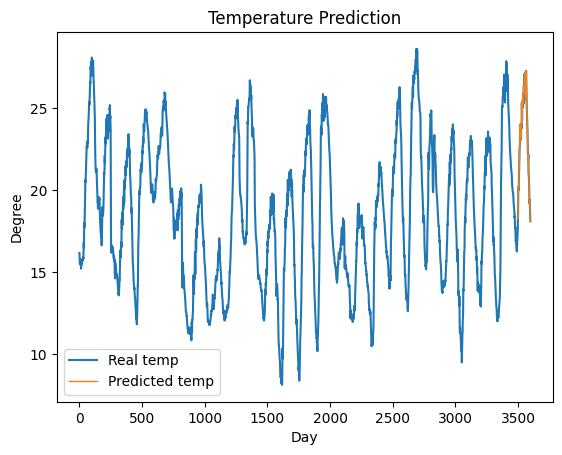

In [24]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

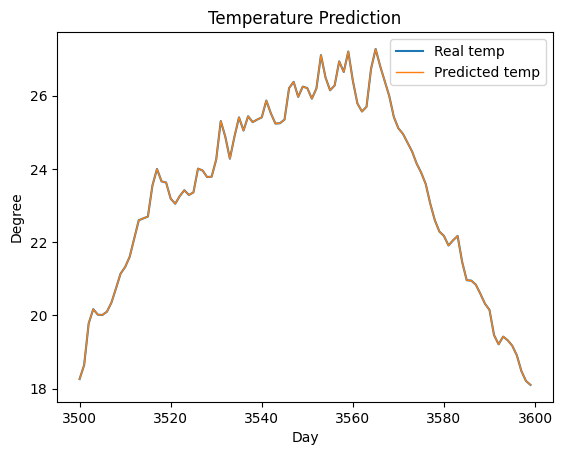

In [25]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2021a


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2021a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2021 00:10:00,978.24,2.01,276.90,-0.82,81.4,7.06,5.75,1.31,3.66,...,1.02,1.63,210.3,0.0,0.0,0.0,0.0,0.0,13.48,434.7
1,01.01.2021 00:20:00,978.24,1.96,276.85,-0.79,81.9,7.04,5.77,1.27,3.67,...,1.56,2.37,199.3,0.0,0.0,0.0,0.0,0.0,13.44,435.4
2,01.01.2021 00:30:00,978.26,1.88,276.76,-0.77,82.5,7.00,5.77,1.22,3.68,...,2.08,2.75,207.8,0.0,0.0,0.0,0.0,0.0,13.39,434.2
3,01.01.2021 00:40:00,978.25,1.78,276.66,-0.71,83.5,6.95,5.80,1.15,3.70,...,2.63,3.31,206.0,0.0,0.0,0.0,0.0,0.0,13.32,434.3
4,01.01.2021 00:50:00,978.26,1.62,276.50,-0.44,86.1,6.87,5.91,0.95,3.77,...,2.16,3.28,192.9,0.0,0.0,0.0,0.0,0.0,13.22,435.8


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[-3.39773451],
       [-3.67122059],
       [-3.81467997],
       [-3.86288966],
       [-3.88841855],
       [-3.84637642],
       [-3.67299188],
       [-3.6228599 ],
       [-3.53493296],
       [-3.43454782],
       [-3.56725146],
       [-3.52981573],
       [-3.1317684 ],
       [-2.83598092],
       [-2.79061494],
       [-2.80789975],
       [-2.73853453],
       [-2.64749123],
       [-2.34909381],
       [-1.7955253 ],
       [-1.45676031],
       [-1.41802913],
       [-1.34450721],
       [-1.34813689],
       [-1.15717081],
       [-1.05514809],
       [-0.97153287],
       [-0.9062444 ],
       [-0.81106468],
       [-0.66155178],
       [-0.50106278],
       [-0.32004166],
       [-0.02861129],
       [ 0.1221747 ],
       [ 0.07926333],
       [ 0.24143511],
       [ 0.43721019],
       [ 0.47140072],
       [ 0.41521968],
       [ 0.58196961],
       [ 0.77814333],
       [ 0.77556868],
       [ 0.61018468],
    

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[8.65889955e-06],
       [8.76280023e-06],
       [8.85997792e-06],
       [8.93474566e-06],
       [8.94388426e-06],
       [8.95404150e-06],
       [8.91664307e-06],
       [9.13530015e-06],
       [9.17674401e-06],
       [9.42799738e-06],
       [9.92602212e-06],
       [1.18202740e-05],
       [1.17971656e-05],
       [1.06037921e-05],
       [1.07451203e-05],
       [9.83224958e-06],
       [1.07247476e-05],
       [1.09883410e-05],
       [1.76189794e-05],
       [1.45180536e-05],
       [1.13327267e-05],
       [1.09928812e-05],
       [1.09809196e-05],
       [1.09711989e-05],
       [1.07351668e-05],
       [1.07309759e-05],
       [1.05313818e-05],
       [1.00486366e-05],
       [1.04573417e-05],
       [1.07843814e-05],
       [1.08088577e-05],
       [1.00749464e-05],
       [1.02497440e-05],
       [9.67340087e-06],
       [1.02163037e-05],
       [1.16389572e-05],
       [9.83056156e-06],
       [9.28049916e-06],


Text(0.5, 1.0, 'Temperature Prediction')

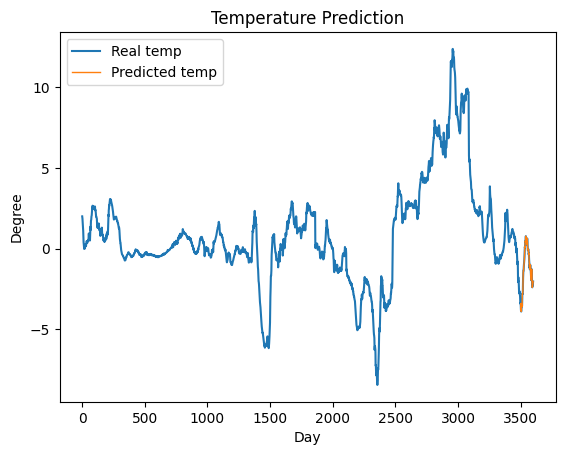

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

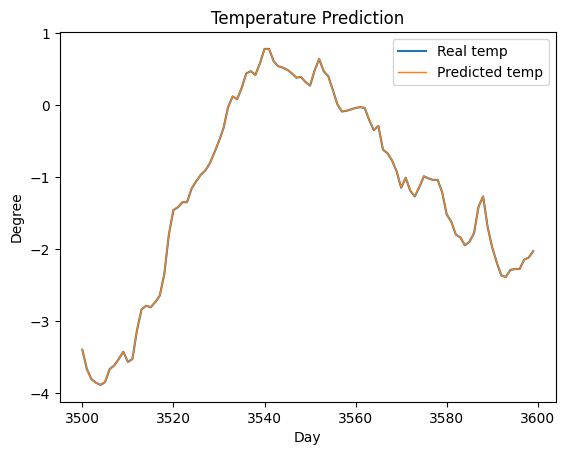

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2021b


In [26]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2021b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2021 00:10:00,985.02,16.07,290.47,12.89,81.4,18.29,14.89,3.40,9.46,...,0.78,1.43,235.7,0.0,0.0,0.0,0.0,0.0,26.35,429.02
1,01.07.2021 00:20:00,985.04,16.02,290.42,12.93,81.9,18.23,14.93,3.30,9.48,...,1.05,2.15,219.2,0.0,0.0,0.0,0.0,0.0,26.30,428.72
2,01.07.2021 00:30:00,985.04,15.96,290.36,12.95,82.3,18.16,14.95,3.21,9.49,...,0.91,1.47,234.1,0.0,0.0,0.0,0.0,0.0,26.25,429.42
3,01.07.2021 00:40:00,985.00,15.87,290.27,12.97,82.9,18.06,14.97,3.09,9.51,...,0.90,1.83,237.6,0.0,0.0,0.0,0.0,0.0,26.23,429.72
4,01.07.2021 00:50:00,985.02,15.79,290.19,12.99,83.4,17.97,14.98,2.98,9.52,...,1.07,1.93,232.3,0.0,0.0,0.0,0.0,0.0,26.21,429.82


In [27]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [28]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [29]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [30]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [31]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [32]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[20.26066447],
       [20.78927101],
       [21.34008976],
       [21.40095058],
       [21.42214886],
       [21.48984337],
       [21.4815669 ],
       [21.69051876],
       [21.74125089],
       [22.08090413],
       [22.58005815],
       [22.89101714],
       [22.95957419],
       [23.24035923],
       [23.65048531],
       [24.04902333],
       [24.30996087],
       [24.58096147],
       [25.33139765],
       [25.34974267],
       [25.57924117],
       [25.74051749],
       [25.58008858],
       [26.09975814],
       [26.45045272],
       [26.67082551],
       [26.71070382],
       [26.85094583],
       [26.6201304 ],
       [26.9208914 ],
       [26.51101607],
       [26.71113598],
       [26.8601278 ],
       [27.46060529],
       [27.58895049],
       [27.61020406],
       [27.86105614],
       [27.42031793],
       [26.99075693],
       [27.2392639 ],
       [27.43925762],
       [27.89100197],
       [28.09950709],
    

In [33]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.06053597e-06],
       [1.06798655e-06],
       [1.08288771e-06],
       [1.06798655e-06],
       [1.07078052e-06],
       [1.09778887e-06],
       [1.19464642e-06],
       [1.14714897e-06],
       [1.12572855e-06],
       [1.13504177e-06],
       [1.15925616e-06],
       [1.06891787e-06],
       [1.05308539e-06],
       [1.07264316e-06],
       [1.10896474e-06],
       [1.09313226e-06],
       [1.07078052e-06],
       [1.09406358e-06],
       [1.17881393e-06],
       [1.07636845e-06],
       [1.08195639e-06],
       [1.07916242e-06],
       [1.09126961e-06],
       [1.14342368e-06],
       [1.14342368e-06],
       [1.13504177e-06],
       [1.20582229e-06],
       [1.35110861e-06],
       [1.26915222e-06],
       [1.06891787e-06],
       [1.63050538e-06],
       [1.41909516e-06],
       [1.31013042e-06],
       [1.43306500e-06],
       [1.23748726e-06],
       [1.28312206e-06],
       [1.41909516e-06],
       [1.55972487e-06],


Text(0.5, 1.0, 'Temperature Prediction')

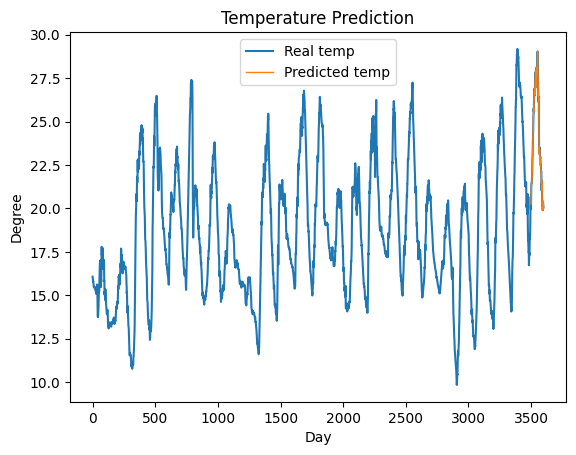

In [34]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

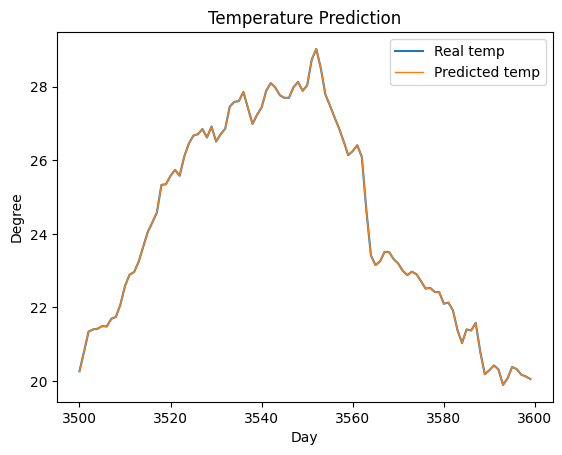

In [35]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2022a


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2022a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2022 00:10:00,995.33,12.74,286.27,9.70,81.7,14.74,12.05,2.70,7.56,...,1.61,4.30,245.9,0.0,0.0,2.88,0.0,0.0,21.16,426.3
1,01.01.2022 00:20:00,995.48,12.72,286.24,9.68,81.7,14.73,12.03,2.69,7.55,...,2.36,5.00,236.0,0.0,0.0,2.92,0.0,0.0,21.15,425.6
2,01.01.2022 00:30:00,995.50,12.66,286.18,9.64,81.8,14.67,12.00,2.67,7.53,...,2.82,5.30,245.5,0.0,0.0,2.91,0.0,0.0,21.14,425.1
3,01.01.2022 00:40:00,995.56,12.65,286.16,9.61,81.7,14.66,11.98,2.68,7.52,...,2.87,6.04,238.4,0.0,0.0,2.90,0.0,0.0,21.12,424.8
4,01.01.2022 00:50:00,995.68,12.63,286.13,9.57,81.6,14.64,11.95,2.69,7.50,...,3.27,6.07,246.4,0.0,0.0,2.93,0.0,0.0,21.08,424.8


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[2.47761484],
       [2.4890448 ],
       [2.51583057],
       [2.36554176],
       [2.34112309],
       [2.32031199],
       [2.38439107],
       [2.27212856],
       [2.21814012],
       [2.23544114],
       [2.30810561],
       [2.39959214],
       [2.32702528],
       [2.37570302],
       [2.29446263],
       [2.19191385],
       [2.19890935],
       [2.22581632],
       [2.25211485],
       [2.30494526],
       [2.16337652],
       [2.17912781],
       [2.07326082],
       [2.05254759],
       [2.06118037],
       [1.99615355],
       [2.00148695],
       [1.99602409],
       [1.96294357],
       [1.98231677],
       [2.05167598],
       [2.14237989],
       [2.18618315],
       [2.26991526],
       [2.35117229],
       [2.42067841],
       [2.3761967 ],
       [2.32272128],
       [2.51591365],
       [2.35262675],
       [2.17620929],
       [2.10613001],
       [2.11985153],
       [2.131939  ],
       [2.00979628],
     

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.03030300e-06],
       [1.04906178e-06],
       [1.16036029e-06],
       [1.60073808e-06],
       [1.02237812e-06],
       [1.03730383e-06],
       [1.04908270e-06],
       [1.04916501e-06],
       [1.05427637e-06],
       [1.12802866e-06],
       [2.11214240e-06],
       [2.13564283e-06],
       [1.28548720e-06],
       [1.28758905e-06],
       [3.99663134e-06],
       [2.28946567e-06],
       [2.03227967e-06],
       [2.17345007e-06],
       [3.22972130e-06],
       [3.03774971e-06],
       [4.04748119e-06],
       [2.90275796e-06],
       [1.38506732e-06],
       [2.07674077e-06],
       [1.23784560e-06],
       [1.51518737e-06],
       [1.52032510e-06],
       [1.58337173e-06],
       [1.58013029e-06],
       [1.57719899e-06],
       [1.39130418e-06],
       [1.31754007e-06],
       [1.32181697e-06],
       [1.42548800e-06],
       [1.36334950e-06],
       [1.31588615e-06],
       [1.21240703e-06],
       [1.46885589e-06],


Text(0.5, 1.0, 'Temperature Prediction')

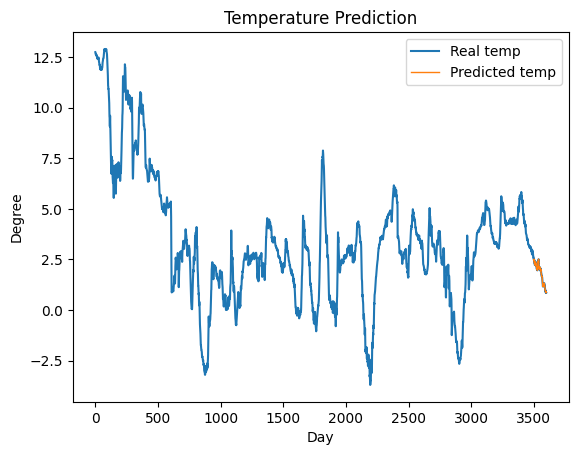

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

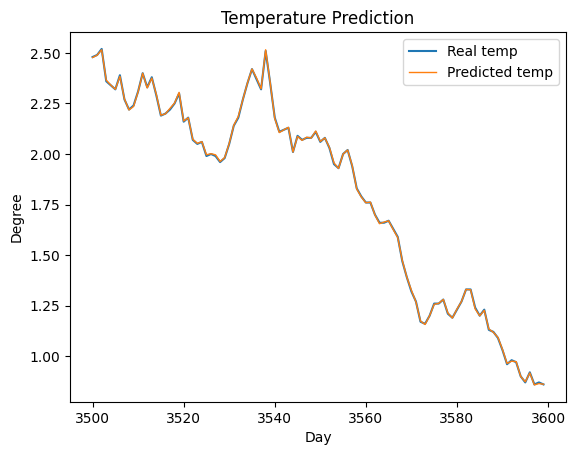

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2022b


In [36]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2022b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.7,27.17,23.01,4.16,14.67,...,1.18,1.63,219.9,0.0,0.0,0.0,0.0,0.0,31.74,447.2
1,01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.8,26.51,23.01,3.50,14.67,...,1.02,1.58,222.4,0.0,0.0,0.0,0.0,0.0,31.63,445.6
2,01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.9,26.11,22.95,3.16,14.63,...,0.99,1.64,191.0,0.0,0.0,0.0,0.0,0.0,31.52,443.1
3,01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.6,26.48,22.67,3.81,14.45,...,1.45,2.40,211.8,0.0,0.0,0.0,0.0,0.0,31.44,443.4
4,01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.0,26.86,22.56,4.30,14.38,...,1.66,2.59,211.9,0.0,0.0,0.0,0.0,0.0,31.37,444.4


In [37]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [38]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [39]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [40]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [41]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [42]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[21.22924014],
       [22.06099331],
       [22.91985201],
       [23.52890061],
       [24.14126003],
       [24.55118739],
       [25.09119056],
       [25.86077161],
       [26.9009549 ],
       [27.41009086],
       [28.31040769],
       [28.92867491],
       [29.39073576],
       [29.86935411],
       [30.26015602],
       [30.70023596],
       [30.70123437],
       [30.82141906],
       [30.91069526],
       [31.05099972],
       [31.32926435],
       [31.66022178],
       [31.52069539],
       [31.60112673],
       [31.88050273],
       [32.22114232],
       [32.14996244],
       [32.54984596],
       [32.53011292],
       [32.42979079],
       [32.67879308],
       [32.67959842],
       [32.69938994],
       [32.91072752],
       [32.99891953],
       [33.48148078],
       [33.43079853],
       [33.6988599 ],
       [33.96021785],
       [34.32056976],
       [34.2893384 ],
       [33.998768  ],
       [33.82941684],
    

In [43]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.10523945e-06],
       [1.14621764e-06],
       [1.11827797e-06],
       [1.13504177e-06],
       [1.13969839e-06],
       [1.15553087e-06],
       [1.16670674e-06],
       [1.17043203e-06],
       [1.19371510e-06],
       [1.19464642e-06],
       [1.22817403e-06],
       [1.31571835e-06],
       [1.44051558e-06],
       [1.40698797e-06],
       [1.40698797e-06],
       [1.47590584e-06],
       [1.58300793e-06],
       [1.46100467e-06],
       [1.63143671e-06],
       [1.50663948e-06],
       [1.58859587e-06],
       [1.59977174e-06],
       [1.68731606e-06],
       [1.71339309e-06],
       [1.74971467e-06],
       [1.87171793e-06],
       [1.74412674e-06],
       [1.73667616e-06],
       [1.82887709e-06],
       [1.76647848e-06],
       [1.62771142e-06],
       [2.04494393e-06],
       [2.00582838e-06],
       [1.91455877e-06],
       [1.92759728e-06],
       [2.23307109e-06],
       [2.17532909e-06],
       [9.62497836e-06],


Text(0.5, 1.0, 'Temperature Prediction')

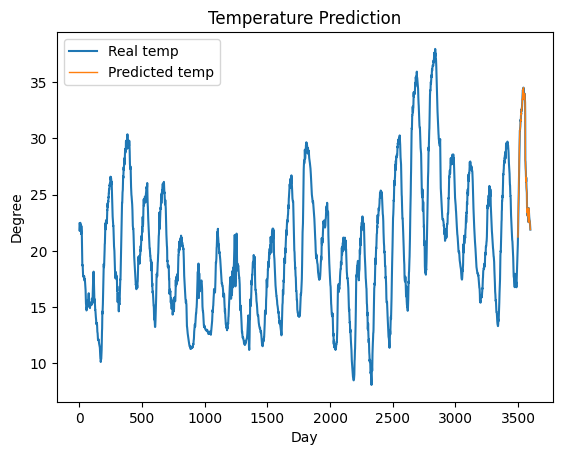

In [44]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

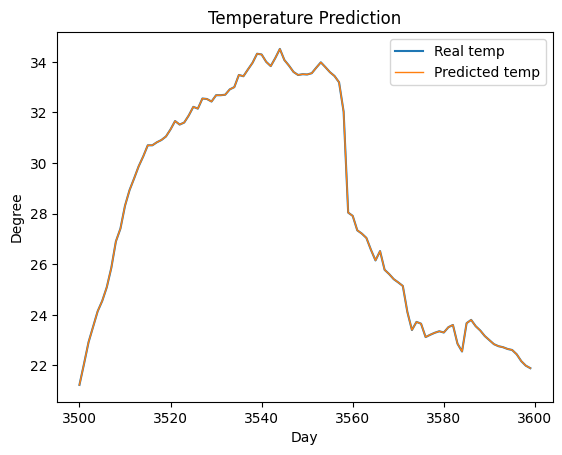

In [45]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2023a


In [ ]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2023a.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2023 00:10:00,988.64,16.64,290.74,6.87,52.40,18.97,9.94,9.03,6.28,...,6.90,11.15,207.1,0.0,0.0,0.0,0.0,0.0,22.73,423.3
1,01.01.2023 00:20:00,988.71,16.61,290.70,7.07,53.22,18.93,10.08,8.86,6.36,...,7.55,10.21,209.1,0.0,0.0,0.0,0.0,0.0,22.67,422.6
2,01.01.2023 00:30:00,988.79,16.57,290.66,7.22,53.91,18.88,10.18,8.70,6.43,...,6.87,10.79,201.7,0.0,0.0,0.0,0.0,0.0,22.63,422.4
3,01.01.2023 00:40:00,988.90,16.37,290.45,7.30,54.90,18.65,10.24,8.41,6.46,...,5.74,8.77,202.8,0.0,0.0,0.0,0.0,0.0,22.59,422.6
4,01.01.2023 00:50:00,989.05,16.29,290.35,7.34,55.32,18.55,10.26,8.29,6.48,...,5.51,7.60,205.4,0.0,0.0,0.0,0.0,0.0,22.56,422.7


In [ ]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [ ]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [ ]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [ ]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [ ]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [ ]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[-0.93848533],
       [-0.86327721],
       [-0.86398626],
       [-0.83846299],
       [-0.84729344],
       [-0.88420517],
       [-0.85818944],
       [-0.83485763],
       [-0.74147877],
       [-0.53434172],
       [-0.66172562],
       [-0.6890058 ],
       [-0.73476904],
       [-0.74281805],
       [-0.73539114],
       [-0.80702523],
       [-0.78999202],
       [-0.6937934 ],
       [-0.64295223],
       [-0.7291597 ],
       [-0.73746474],
       [-0.65005414],
       [-0.72508298],
       [-0.67569496],
       [-0.67016643],
       [-0.63520833],
       [-0.74852947],
       [-0.94142326],
       [-1.0102881 ],
       [-0.9837499 ],
       [-0.82379911],
       [-0.75941759],
       [-0.78658739],
       [-0.90886697],
       [-0.89104045],
       [-0.93714135],
       [-0.84337142],
       [-0.81186457],
       [-0.80258204],
       [-0.68740649],
       [-0.59635771],
       [-0.68124396],
       [-0.61633487],
    

In [ ]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[6.26121909e-06],
       [6.26814739e-06],
       [6.29182927e-06],
       [6.25941965e-06],
       [6.25547654e-06],
       [6.25738943e-06],
       [6.27062849e-06],
       [6.28536094e-06],
       [6.30409358e-06],
       [6.31944175e-06],
       [6.38640421e-06],
       [6.44364531e-06],
       [6.69438345e-06],
       [6.77151246e-06],
       [6.89610437e-06],
       [7.06096575e-06],
       [6.99563970e-06],
       [7.10018384e-06],
       [7.14458219e-06],
       [7.84782737e-06],
       [7.91605038e-06],
       [7.83222430e-06],
       [7.77245663e-06],
       [8.25341289e-06],
       [8.76496387e-06],
       [8.53728824e-06],
       [8.59398205e-06],
       [9.72309107e-06],
       [9.57610104e-06],
       [9.54238380e-06],
       [9.33728865e-06],
       [8.54945046e-06],
       [8.94689441e-06],
       [9.35183397e-06],
       [9.38712077e-06],
       [1.00893196e-05],
       [9.49776876e-06],
       [9.25441481e-06],


Text(0.5, 1.0, 'Temperature Prediction')

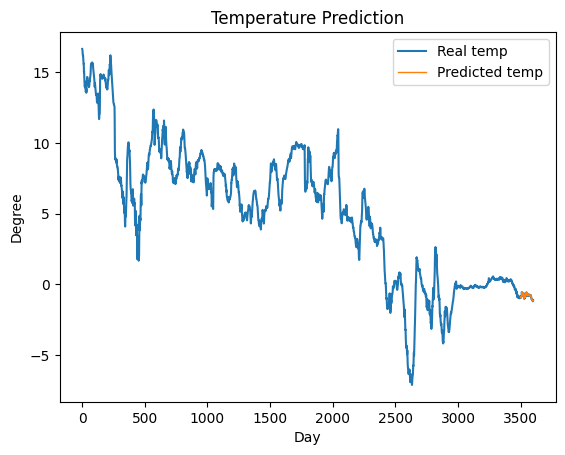

In [ ]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

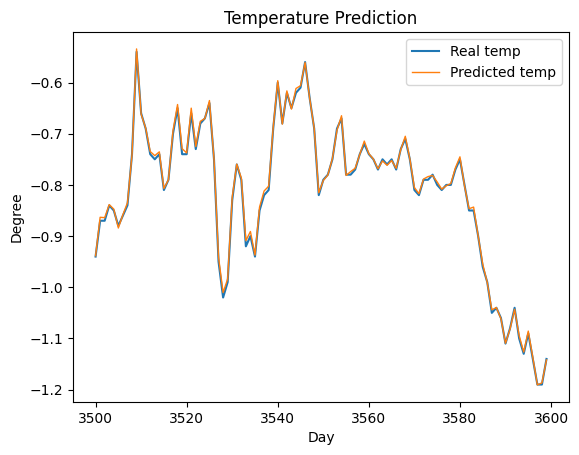

In [ ]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

## 2023b


In [46]:
# Load data
weather_data = pd.read_csv('/content/mpi_roof_2023b.csv', encoding='latin-1')
weather_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2023 00:10:00,984.99,15.21,289.61,15.19,99.9,17.31,17.29,0.02,10.99,...,1.02,1.32,208.1,0.0,0.0,0.0,0.0,0.0,27.10,450.3
1,01.07.2023 00:20:00,985.00,15.03,289.43,15.03,100.0,17.11,17.11,0.00,10.88,...,0.47,1.11,219.9,0.0,0.0,0.0,0.0,0.0,27.05,451.0
2,01.07.2023 00:30:00,984.98,14.86,289.26,14.64,98.6,16.92,16.69,0.24,10.61,...,1.06,1.77,226.7,0.0,0.0,0.0,0.0,0.0,26.97,439.4
3,01.07.2023 00:40:00,984.91,14.91,289.32,14.47,97.2,16.98,16.50,0.48,10.49,...,1.29,1.89,242.1,0.0,0.0,0.0,0.0,0.0,26.87,438.2
4,01.07.2023 00:50:00,984.92,14.77,289.17,14.46,98.0,16.83,16.49,0.34,10.48,...,1.45,2.06,238.6,0.0,0.0,0.0,0.0,0.0,26.73,440.0


In [47]:
# Preparing data
X = weather_data.drop(columns=['Date Time', 'T (degC)'])
X_test = X.iloc[3500:3600]
X = X.iloc[:3500]

y = weather_data['T (degC)']
y_test = y.iloc[3500:3600]
y = y.iloc[:3500]
y = y.to_numpy().reshape(-1, 1)  # Reshape to [N, 1] array

print(X.shape, y.shape)

(3500, 20) (3500, 1)


In [48]:
# Define kernel function (e.g., RBF kernel)
kernel = gpflow.kernels.RBF()

# Create GP model with Gaussian likelihood
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

In [49]:
# Optimize the model parameters
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=100))

In [50]:
# Prediction
X_pred = X_test.values.reshape(-1, X_test.shape[1])
mean, var = model.predict_y(X_pred)

In [51]:
range_train = np.array([[x] for x in range(len(y))], dtype=np.float64)
range_test = np.array([[x] for x in range(len(y), len(y) + len(y_test))], dtype=np.float64)

In [52]:
mean

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[16.77918095],
       [16.74026735],
       [16.47961126],
       [16.08960393],
       [16.11971483],
       [16.03969025],
       [16.22984617],
       [16.2497393 ],
       [16.28004127],
       [16.32892438],
       [16.41925996],
       [16.34825888],
       [16.40096923],
       [16.47858323],
       [16.20921338],
       [15.92946267],
       [16.04860634],
       [16.14974933],
       [16.07030849],
       [15.8915992 ],
       [15.92000119],
       [15.85014923],
       [15.8099961 ],
       [15.78062165],
       [15.58130289],
       [15.33143575],
       [14.83228028],
       [14.5026663 ],
       [14.37017804],
       [14.5901133 ],
       [14.9292516 ],
       [15.15859604],
       [15.44858023],
       [15.59875905],
       [15.60746761],
       [15.60846305],
       [15.60979914],
       [15.61974123],
       [15.54032562],
       [15.39131873],
       [15.38270162],
       [15.20030437],
       [14.94941723],
    

In [53]:
var

<tf.Tensor: shape=(100, 1), dtype=float64, numpy=
array([[1.07590279e-06],
       [1.10756776e-06],
       [1.14825491e-06],
       [1.09778887e-06],
       [1.07508788e-06],
       [1.09790529e-06],
       [1.09371433e-06],
       [1.10756776e-06],
       [1.10099029e-06],
       [1.12671808e-06],
       [1.07945346e-06],
       [2.56718306e-06],
       [1.14167745e-06],
       [1.55436976e-06],
       [3.58046202e-06],
       [2.54424924e-06],
       [5.04863385e-06],
       [6.14066778e-06],
       [4.42872227e-06],
       [9.04773299e-06],
       [1.21284899e-05],
       [5.84171323e-06],
       [2.92236621e-06],
       [5.93961852e-06],
       [3.35537300e-06],
       [6.57192834e-06],
       [2.55535048e-05],
       [2.19967257e-05],
       [2.35892290e-05],
       [1.74315570e-05],
       [1.16906518e-05],
       [1.33054488e-05],
       [1.29518372e-05],
       [6.49887773e-06],
       [1.05477444e-05],
       [2.53481960e-06],
       [1.79174060e-06],
       [6.60999615e-06],


Text(0.5, 1.0, 'Temperature Prediction')

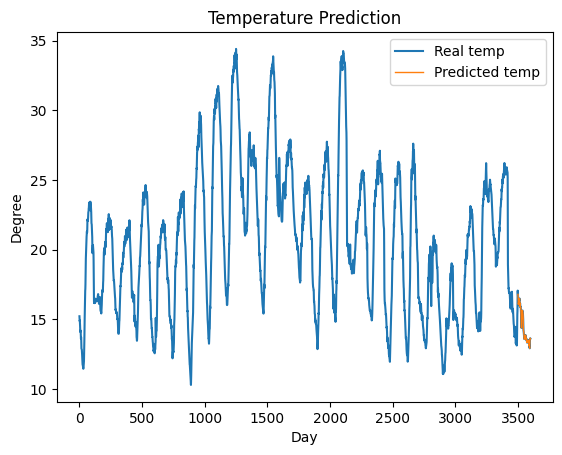

In [54]:
plt.figure()
plt.plot(np.append(range_train, range_test), np.append(y, y_test), mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')

Text(0.5, 1.0, 'Temperature Prediction')

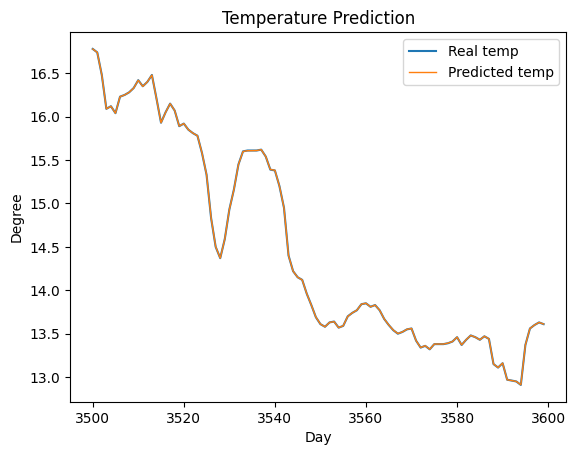

In [55]:
plt.figure()
plt.plot(range_test, y_test, mew=2, label='Real temp')
plt.plot(range_test, mean, lw=1, label='Predicted temp')
plt.xlabel('Day')
plt.ylabel('Degree')
plt.legend()
plt.title('Temperature Prediction')